<html>
<body>
<h1 align="center"><font color="blue">Car Price Prediction (Linear Regression - RFE)
</font></h1>
<h3>M.Suresh-G8DS</h3>
</body>
</html>

# Importing and Understanding Data

In [856]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [857]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [858]:
#Importing CarPrice_Assignment.csv
car=pd.read_csv('CarPrice_Assignment.csv')

In [859]:
# Looking at the first five rows
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [860]:
#checking number of rows and columns in dataset
car.shape

(205, 26)

In [861]:
#knowing the info about data
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [862]:
# summary of the dataset
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [863]:
#Checking for duplicates
car.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

In [864]:
#Checking for null values
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Data Preparation and Preprocessing

<h2>Processing on Categorical variables</h2>
<ul>
<li>fueltype</li>
<li>aspiration</li>
<lidoornumber></li>
<li>doornumber</li>
<li>carbody</li>
<li>carbody</li>
<li>drivewheel</li>
<li>enginelocation</li>
<li>fuelsystem</li>
<li>enginetype</li>
<li>cylindernumber</li>


</ul>

In [865]:
#checking the categories of "fueltype"
car['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [866]:
#defining fueltype_map function for mapping fueltype
def fueltype_map(x):
    return x.map({'gas': 0, 'diesel': 1})

# Applying the function to the 'fueltype' column
car['fueltype'] = fueltype_map(car['fueltype'])


In [867]:
#checking the categories of "aspiration"
car['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [868]:
#defining aspiration_map function for mapping aspiration
def aspiration_map(x):
    return x.map({'std': 0, 'turbo': 1})

# Applying the function to the 'aspiration' column
car['aspiration'] = aspiration_map(car['aspiration'])


In [869]:
#checking the categories of "doornumber"
car['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [870]:
#defining doornumber_map function for mapping doornumber
def doornumber_map(x):
    return x.map({'four': 0, 'two': 1})

# Applying the function to the 'doornumber' column
car['doornumber'] = doornumber_map(car['doornumber'])

In [871]:
#checking the dataset after applying fueltype_map,aspiration_map,doornumber_map functions
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,1,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,1,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,1,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [872]:
#checking the categories of "carbody"
car['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [873]:
#creating dummy variables for carbody
carbody=pd.get_dummies(car['carbody']).astype(int)
carbody.head()

,convertible,hardtop,hatchback,sedan,wagon
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


<p>Here we don't need five columns so we can drop convertible column because it can be identified by last four columns</p>
<ul>
<li>0000---->convertible</li>
<li>1000---->hardtop</li>
<li>0100---->hatchback</li>
<li>0010---->sedan</li>
<li>0001---->wagon</li>
</ul>

In [874]:
#dropping the first columns of carbody
carbody=pd.get_dummies(car['carbody'],drop_first=True).astype(int)

#concating the results to car dataframe
car= pd.concat([car,carbody], axis = 1)

#drop carbody,we have created dummies for it
car.drop(['carbody'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,...,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon
0,1,3,alfa-romero giulia,0,0,1,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,13495.0,0,0,0,0
1,2,3,alfa-romero stelvio,0,0,1,rwd,front,88.6,168.8,...,9.0,111,5000,21,27,16500.0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,1,rwd,front,94.5,171.2,...,9.0,154,5000,19,26,16500.0,0,1,0,0
3,4,2,audi 100 ls,0,0,0,fwd,front,99.8,176.6,...,10.0,102,5500,24,30,13950.0,0,0,1,0
4,5,2,audi 100ls,0,0,0,4wd,front,99.4,176.6,...,8.0,115,5500,18,22,17450.0,0,0,1,0


In [875]:
#checking the categories of "drivewheel"
car['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [876]:
#creating dummy variables for drivewheel
drive=pd.get_dummies(car['drivewheel']).astype(int)
drive.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


<p>Here we dont need three columns so we can drop 4wd which can be identified by last two columns</p>
<ul>
<li>4wd---->00</li>
<li>fwd---->10</li>
<li>rwd---->01</li>

</ul>

In [877]:
#dropping the first column of drivewheel
drive=pd.get_dummies(car['drivewheel'],drop_first=True).astype(int)

#concating the results to car dataframe
car= pd.concat([car,drive], axis = 1)

#drop carbody,we have created dummies for it
car.drop(['drivewheel'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero giulia,0,0,1,front,88.6,168.8,64.1,...,5000,21,27,13495.0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,0,0,1,front,88.6,168.8,64.1,...,5000,21,27,16500.0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,0,0,1,front,94.5,171.2,65.5,...,5000,19,26,16500.0,0,1,0,0,0,1
3,4,2,audi 100 ls,0,0,0,front,99.8,176.6,66.2,...,5500,24,30,13950.0,0,0,1,0,1,0
4,5,2,audi 100ls,0,0,0,front,99.4,176.6,66.4,...,5500,18,22,17450.0,0,0,1,0,0,0


In [878]:
#checking the categories of "doornumber"
car['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [879]:
def enginelocation_map(x):
    return x.map({'front': 0, 'rear': 1})

# Applying the function to the 'fueltype' column
car['enginelocation'] = enginelocation_map(car['enginelocation'])


In [880]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1,3,alfa-romero giulia,0,0,1,0,88.6,168.8,64.1,...,5000,21,27,13495.0,0,0,0,0,0,1
1,2,3,alfa-romero stelvio,0,0,1,0,88.6,168.8,64.1,...,5000,21,27,16500.0,0,0,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,0,0,1,0,94.5,171.2,65.5,...,5000,19,26,16500.0,0,1,0,0,0,1
3,4,2,audi 100 ls,0,0,0,0,99.8,176.6,66.2,...,5500,24,30,13950.0,0,0,1,0,1,0
4,5,2,audi 100ls,0,0,0,0,99.4,176.6,66.4,...,5500,18,22,17450.0,0,0,1,0,0,0


In [881]:
#checking the categories of "fuelsystem"
car['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [882]:
#creating dummy variables for fuelsystem
fuelsystem=pd.get_dummies(car['fuelsystem']).astype(int)
fuelsystem.head()

,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


<p>Here we dont need eight columns we can identify 1bbI with last seven columns so drop it<p>

In [883]:
#dropping the first column of fuelsystem
fuelsystem=pd.get_dummies(car['fuelsystem'],drop_first=True).astype(int)

#concating the results to car dataframe
car= pd.concat([car,fuelsystem], axis = 1)

#drop carbody,we have created dummies for it
car.drop(['fuelsystem'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,wagon,fwd,rwd,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,0,0,1,0,88.6,168.8,64.1,...,0,0,1,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,1,0,88.6,168.8,64.1,...,0,0,1,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,1,0,94.5,171.2,65.5,...,0,0,1,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,0,0,99.8,176.6,66.2,...,0,1,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,0,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,1,0,0


In [884]:
#checking the categories of "enginetype"
car['enginetype'].value_counts()


enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [885]:
#creating dummy variables for enginetype
enginetype=pd.get_dummies(car['enginetype']).astype(int)
enginetype.head()

,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


<p>Here we dont need seven columns dohc can be identified with last six columns so drop it<p>

In [886]:
#dropping the first column of enginetype
enginetype=pd.get_dummies(car['enginetype'],drop_first=True).astype(int)

#concating the results to car dataframe
car= pd.concat([car,enginetype], axis = 1)

#drop carbody,we have created dummies for it
car.drop(['enginetype'],axis=1,inplace=True)
car.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,1,3,alfa-romero giulia,0,0,1,0,88.6,168.8,64.1,...,0,1,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,0,0,1,0,88.6,168.8,64.1,...,0,1,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,1,0,94.5,171.2,65.5,...,0,1,0,0,0,0,0,0,1,0
3,4,2,audi 100 ls,0,0,0,0,99.8,176.6,66.2,...,0,1,0,0,0,0,1,0,0,0
4,5,2,audi 100ls,0,0,0,0,99.4,176.6,66.4,...,0,1,0,0,0,0,1,0,0,0


In [887]:
#checking the categories of "cylindernumber"
car['cylindernumber'].value_counts()


cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [888]:
#creating dummy variables for cylindernumber
cylindernumber=pd.get_dummies(car['cylindernumber']).astype(int)
cylindernumber.head()


,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


<p>Here we dont need seven columns,"eight" can be identified using last  six columns so drop it</p>

In [889]:
#creating dummy variables for cylindernumber
cylindernumber=pd.get_dummies(car['cylindernumber'],drop_first=True).astype(int)

#concating the results to car dataframe
car= pd.concat([car,cylindernumber], axis = 1)

#drop carbody,we have created dummies for it
car.drop(['cylindernumber'],axis=1,inplace=True)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,1,3,alfa-romero giulia,0,0,1,0,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,0,0,1,0,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,1,0,94.5,171.2,65.5,...,0,0,1,0,0,0,1,0,0,0
3,4,2,audi 100 ls,0,0,0,0,99.8,176.6,66.2,...,1,0,0,0,0,1,0,0,0,0
4,5,2,audi 100ls,0,0,0,0,99.4,176.6,66.4,...,1,0,0,0,1,0,0,0,0,0


<h3>Cleaning and preparing CarName column</h3>

In [890]:
#checking first 50  names of cars in CarName
car['CarName'][:50]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
30                  honda civic
31      

In [891]:
#extarcting company name from CarName column
car['car_company'] = car['CarName'].apply(lambda x: x.split(" ")[0])

In [892]:
#first 50 car company names after extracting
car['car_company'].head(50)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
30          honda
31          honda
32          honda
33          honda
34          honda
35          honda
36          honda
37          honda
38          honda
39          honda
40          honda
41          honda
42          honda
43          isuzu
44          isuzu
45          isuzu
46          isuzu
47         jaguar
48         jaguar
49         jaguar
Name: car_company, dtype: object

In [893]:
#checking the count of car_company
car['car_company'].value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

In [894]:
#drop CarName because we added car_company to dataframe
car.drop(['CarName'],axis=1,inplace=True)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,ohcf,ohcv,rotor,five,four,six,three,twelve,two,car_company
0,1,3,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,1,0,0,0,0,alfa-romero
1,2,3,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,1,0,0,0,0,alfa-romero
2,3,1,0,0,1,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,1,0,0,0,alfa-romero
3,4,2,0,0,0,0,99.8,176.6,66.2,54.3,...,0,0,0,0,1,0,0,0,0,audi
4,5,2,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,0,1,0,0,0,0,0,audi


In [895]:
#correcting mispelt carnames
car['car_company'] = car['car_company'].replace("toyouta","toyota")
car['car_company'] = car['car_company'].replace("porcshce","porsche")
car['car_company'] = car['car_company'].replace("Nissan","nissan")
car['car_company'] = car['car_company'].replace("maxda", "mazda")
car['car_company'] = car['car_company'].replace("vokswagen","volkswagen")
car['car_company'] = car['car_company'].replace("vw","volkswagen")

In [896]:
##checking the count of car_company after correcting errors
car['car_company'].value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

In [897]:
#creating dummies for car_company
car_company=pd.get_dummies(car['car_company']).astype(int)
car_company.head()

,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [898]:
car_company=pd.get_dummies(car['car_company'],drop_first=True).astype(int)
car= pd.concat([car,car_company], axis = 1)
car.drop(['car_company'],axis=1,inplace=True)
car.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,3,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,0,1,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,1,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,0,0,0,0,0
3,4,2,0,0,0,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,0,0,0,0
4,5,2,0,0,0,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,0,0,0,0


<p>In this dataset car_ID and symboling does not help for estimating the price of car.<br>
So drop these two columns.
</p>

In [899]:
car.drop(['car_ID','symboling'],axis=1,inplace=True)
car.head(10)

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,99.8,177.3,66.3,53.1,2507,136,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,105.8,192.7,71.4,55.7,2844,136,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,105.8,192.7,71.4,55.7,2954,136,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,105.8,192.7,71.4,55.9,3086,131,...,0,0,0,0,0,0,0,0,0,0
9,0,1,1,0,99.5,178.2,67.9,52.0,3053,131,...,0,0,0,0,0,0,0,0,0,0


# Spliting the data into train data and test data

In [900]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(car, train_size = 0.7, test_size = 0.3, random_state = 100)

# Rescaling the Features

In [901]:
#using MinMaxScaler() for rescaling the features

In [902]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

<h3>Resacalling on numeric variables</h3>
<ul>
<li>wheelbase</li>
<licarlength></li>
<li>carwidth</li>
<li>carheight</li>
<li>curbweight</li>
<li>enginesize</li>
<li>boreratio</li>
<li>stroke</li>
<li>compressionratio</li>
<li>horsepower</li>
<li>peakrpm</li>
<li>citympg</li>
<li>highwaympg</li>
<li>price</li>
</ul>


In [903]:
# Apply scaler() to all the columns except  'dummy' variables
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
122,0,0,0,0,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,0,1,0,0,0,0,0,0,0
125,0,0,1,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,1,0,0,0,0,0,0
166,0,0,1,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,0,0,0,0,0
199,0,1,0,0,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,0,0,0,0,0,1


# Dividing into X and Y sets for the model building

In [904]:
#Dividing data into X and y variables
#removing price from car dataframe which is dependent variable
y_train = df_train.pop('price')
X_train = df_train

# Building our model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)


# RFE

Recursive feature elimination


In [905]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Creating and fitting the linear regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Specifing the number of features to select
num_features_to_select = 10

# Running RFE with the specified number of features
rfe = RFE(estimator=lm, n_features_to_select=num_features_to_select)
rfe.fit(X_train, y_train)

# Get the selected features and their rankings
selected_features = X_train.columns[rfe.support_]
feature_rankings = rfe.ranking_

In [906]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 25),
 ('aspiration', False, 14),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 26),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 27),
 ('hardtop', False, 31),
 ('hatchback', False, 30),
 ('sedan', False, 32),
 ('wagon', False, 33),
 ('fwd', False, 50),
 ('rwd', False, 42),
 ('2bbl', False, 47),
 ('4bbl', False, 34),
 ('idi', False, 24),
 ('mfi', False, 52),
 ('mpfi', False, 36),
 ('spdi', False, 35),
 ('spfi', False, 51),
 ('dohcv', False, 12),
 ('l', False, 7),
 ('ohc', False, 53),
 ('ohcf', False, 10),
 ('ohcv', False, 41),
 ('rotor', True, 1),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 29),
 ('three', True, 1),
 ('twelve', True, 1),
 ('two', False, 3)

In [907]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'three', 'twelve', 'bmw', 'porsche'],
      dtype='object')

In [908]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'five', 'four', 'six', 'two',
       'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [909]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [910]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [911]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


# MODEL 1

In [912]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.21e-64
Time:                        16:15:57   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1594      0.019     -8.

In [913]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,11.19
3,curbweight,9.26
4,enginesize,7.23
2,carwidth,4.92
5,boreratio,1.85
10,porsche,1.82
1,enginelocation,1.66
8,twelve,1.49
6,rotor,1.24
9,bmw,1.13


<p>twelve is insignificant in presence of other variables; can be dropped</p>

In [914]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

<p>Rebuilding the model without twelve</p>

# MODEL 2

In [915]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.18e-65
Time:                        16:16:02   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1587      0.018     -8.

In [916]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,11.15
3,curbweight,8.64
4,enginesize,5.13
2,carwidth,4.91
5,boreratio,1.85
9,porsche,1.80
1,enginelocation,1.65
6,rotor,1.17
8,bmw,1.09
7,three,1.05


<p>three is insignificant in presence of other variables; can be dropped</p>

In [917]:
X_train_new = X_train_new.drop(["three"], axis = 1)

<p>Rebuilding model without three</p>

# MODEL 3

In [918]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.55e-65
Time:                        16:16:04   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1478      0.018     -8.

<p>boreratio is insignificant in presence of other variables; can be dropped</p>

In [919]:
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

# MODEL 4

In [920]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.32e-64
Time:                        16:16:06   Log-Likelihood:                 182.43
No. Observations:                 143   AIC:                            -348.9
Df Residuals:                     135   BIC:                            -325.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1744      0.017    -10.

In [921]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,8.10
3,curbweight,7.94
4,enginesize,5.12
2,carwidth,4.79
7,porsche,1.67
1,enginelocation,1.65
5,rotor,1.17
6,bmw,1.09


<p>porsche is insignificant in presence of other variables; can be dropped</p>

In [922]:
X_train_new = X_train_new.drop(["porsche"], axis = 1)

# MODEL 5

In [923]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           1.43e-64
Time:                        16:16:09   Log-Likelihood:                 179.49
No. Observations:                 143   AIC:                            -345.0
Df Residuals:                     136   BIC:                            -324.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1826      0.016    -11.

In [924]:
X_train_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'rotor', 'bmw'],
      dtype='object')

In [925]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)

,Features,VIF
0,const,7.75
3,curbweight,7.56
4,enginesize,5.06
2,carwidth,4.42
5,rotor,1.17
1,enginelocation,1.09
6,bmw,1.09


In [926]:
X_train_new = X_train_new.drop(["rotor"], axis = 1)

# MODEL 6

In [927]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     214.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           6.87e-63
Time:                        16:16:11   Log-Likelihood:                 172.52
No. Observations:                 143   AIC:                            -333.0
Df Residuals:                     137   BIC:                            -315.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1813      0.017    -10.

In [928]:
#Calculating the Variance Inflation Factor
checkVIF(X_train_new)


,Features,VIF
0,const,7.74
3,curbweight,7.26
2,carwidth,4.40
4,enginesize,4.35
5,bmw,1.09
1,enginelocation,1.08


In [929]:
X_train_new.columns

Index(['const', 'enginelocation', 'carwidth', 'curbweight', 'enginesize',
       'bmw'],
      dtype='object')

## Residual Analysis of the train data

In [930]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

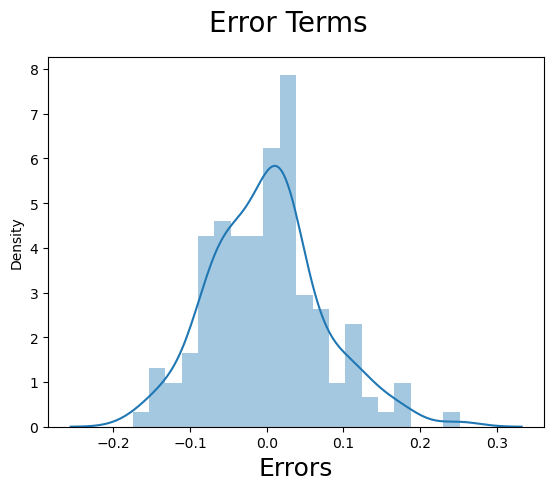

In [931]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)   


# Making Predictions
Applying the scaling on the test sets

In [932]:
num_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [933]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

<b>Dividing into X_test and y_test<b>

In [934]:
y_test = df_test.pop('price')
X_test = df_test

In [935]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [936]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [937]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)



0.8881030657537318

# MODEL EVALUATION

Text(0, 0.5, 'y_pred')

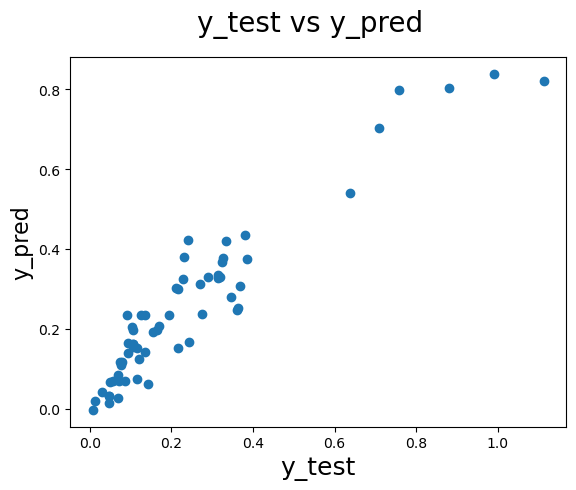

In [938]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

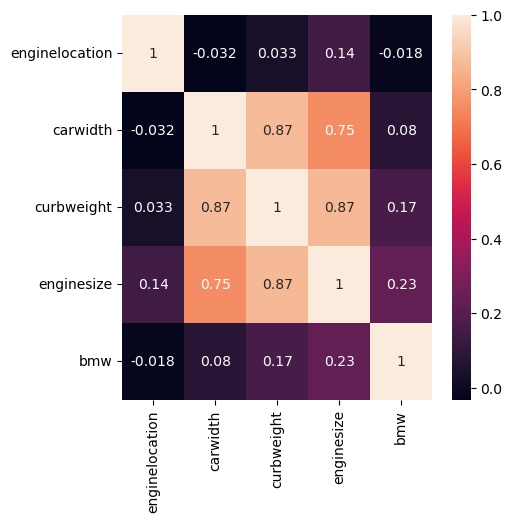

In [939]:
plt.figure(figsize = (5,5))
sns.heatmap(X_train_new.corr(), annot = True)
plt.show()